<a href="https://colab.research.google.com/github/cclljj/Google_colab_ipynb/blob/master/LittleTheorem_for_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Read data from [The Humanitarian Data Exchange](https://data.humdata.org/):


* [The number of COVID-19 confirmed cases (accumulated)](https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv)
* [The number of COVID-19 death cases (accumulated)](https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv)
* [The number of COVID-19 recovered cases (accumulated)](https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv)


# New Section

In [1]:
import pandas as pd
import numpy as np

import os, matplotlib
matplotlib.use('Agg')

import matplotlib.pyplot as plt

import pylab as plot

from datetime import datetime
version = datetime.utcnow().strftime("%Y/%m/%d")

WINDOW = 120  # sliding window size for calculating N, A, T, and D
PLOT_FONT_SIZE = 26
LEGEND_FONT_SIZE = 20
params = {'legend.fontsize': LEGEND_FONT_SIZE,
          'legend.handlelength': 2}
plot.rcParams.update(params)

IMG_FOLDER = "."  # "/opendata/data/COVID19-Analysis/images/"
if not os.path.exists(IMG_FOLDER):
  os.makedirs(IMG_FOLDER)

PLOT_Countries = {
    "Asia"    : {
        "fname" : "asia",
        "countries" : ['Taiwan','Japan','Thailand','Vietnam','Singapore',
                      'Philippines','Hong Kong, China','Macau, China', 
                      'China', 'Korea, South']
    },
    "Europe"  : {
        "fname" : "europe",
        "countries" : ['Italy','Iceland','France','United Kingdom','Germany',
                      'Spain','Portugal','Russia','Sweden','Czechia']
    },
    "America & Oceania" : {
        "fname" : "america",
        "countries" : ['US','Mexico','Brazil','Argentina','Chile',
                      'Venezuela','New Zealand','Australia']
    },
    "Others"  : {
        "fname" : "other",
        "countries" : ['India','Iran','Israel','Turkey',
                       'Egypt','Nigeria','Kenya']
    },
    "Case 1"  : {
        "fname" : "case1",
        "countries" : ['Taiwan','Iceland','Germany','New Zealand',"Malta",
                       'Mauritius','San Marino','Malaysia']
    },       
    "Case 2"  : {
        "fname" : "tw_flight",
        "countries" : ['Canada', 'US', 'Macau, China', 'Hong Kong, China', 
                       'China', 'Japan', 'Philippines', 'Vietnam', 'Thailand', 
                       'United Arab Emirates', 'Korea, South', 'Malaysia', 
                       'Singapore', 'Cambodia', 'Indonesia', 'Netherlands', 
                       'France', 'United Kingdom']  
    },      
    "Case 3"  : {
        "fname" : "case3",
        "countries" : ['Taiwan','Israel','Indonesia','Japan',"Korea, South",'Malaysia','New Zealand',
                       'Singapore','Vietnam']
    },       
}

# confirmed cases
df1 = pd.read_csv('https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv', keep_default_na=False)  
# deadth cases
df2 = pd.read_csv('https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv', keep_default_na=False)
# recovered cases
df3 = pd.read_csv('https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv', keep_default_na=False)


In [2]:
for df in [df1, df2, df3]:
  for index, row in df.iterrows():
    if row['Country/Region'] == "Taiwan*":
     df.at[index,'Country/Region'] = "Taiwan"
    elif row['Country/Region'] == "China":
      if row['Province/State'] in ["Hong Kong", "Macau"]:
        row['Country/Region'] = row['Province/State'] + ", " + row['Country/Region']
        df.at[index,'Country/Region'] = row['Country/Region']
    elif row['Country/Region'] in ["Denmark","France","Netherlands","United Kingdom"]:
      if row['Province/State']:
        row['Country/Region'] = row['Country/Region'] + " (" + row['Province/State'] + ")"
        df.at[index,'Country/Region'] = row['Country/Region']
  
  df.drop(df[df['Country/Region'] == "Diamond Princess"].index, inplace=True)

  for h in df.columns:
    if h not in ["Country/Region", "Province/State", "Lat", "Long"]:
      df[h] = df[h].astype(float)

for country in df1["Country/Region"]:
  print(country)

Afghanistan
Albania
Algeria
Andorra
Angola
Antarctica
Antigua and Barbuda
Argentina
Armenia
Australia
Australia
Australia
Australia
Australia
Australia
Australia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burma
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Canada
Central African Republic
Chad
Chile
China
China
China
China
China
China
China
China
China
China
China
China
Hong Kong, China
China
China
China
China
China
China
China
Macau, China
China
China
China
China
China
China
China
China
China
China
China
China
China
Colombia
Comoros
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Denmark (Faroe Islands)
Denmark (Greenland)
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea


In [3]:
print("df1", df1)
print("df2", df2)
print("df3", df3)


df_groups = df1.groupby(df1["Country/Region"])
df1 = df_groups.sum().reset_index()
df_groups = df2.groupby(df2['Country/Region'])
df2 = df_groups.sum().reset_index()
df_groups = df3.groupby(df3['Country/Region'])
df3 = df_groups.sum().reset_index()

for col in ['Province/State','Lat','Long']:
  if col in df1.columns:
    df1 = df1.drop(columns=col)
    df2 = df2.drop(columns=col)
    df3 = df3.drop(columns=col)

df1     Province/State        Country/Region  ...   2/12/22   2/13/22
0                            Afghanistan  ...  170152.0  170604.0
1                                Albania  ...  267551.0  268008.0
2                                Algeria  ...  261226.0  261752.0
3                                Andorra  ...   37140.0   37140.0
4                                 Angola  ...   98514.0   98514.0
..             ...                   ...  ...       ...       ...
277                   West Bank and Gaza  ...  600128.0  600128.0
278                 Winter Olympics 2022  ...     498.0     501.0
279                                Yemen  ...   11664.0   11671.0
280                               Zambia  ...  309293.0  309502.0
281                             Zimbabwe  ...  231299.0  231381.0

[281 rows x 758 columns]
df2     Province/State        Country/Region         Lat  ... 2/11/22  2/12/22  2/13/22
0                            Afghanistan    33.93911  ...  7478.0   7488.0   7494.0
1     

**Little Theorem**: $N = \lambda \times T$

where $N$ is the number of remaining cases, $\lambda$ is the arrival rate of the confirmed cases, and $T$ is the average time for each case in COVID-19 status.

Below, we use $A$ to denote $\lambda$ in the calculation.

In [4]:
#print("df1", df1)
#print("df2", df2)
#print("df3", df3)

# N: total number of unrecovered cases, which is equal to the # of confirmed cases - # of death - # of recovered cases
N = df1.copy()

for index, row in df1.iterrows():
  country = df1.at[index,"Country/Region"]
  index2 = df2["Country/Region"].loc[lambda x: x==country].index.tolist()
  index3 = df3["Country/Region"].loc[lambda x: x==country].index.tolist()
  if len(index2)>0:
    index2 = index2[0]
  else:
    index2 = -1
  if len(index3)>0:
    index3 = index3[0]
  else:
    index3 = -1
  
  for h in N.columns:
    if h != "Country/Region":
      n1 = df1.at[index,h]
      if index2>=0:
        n2 = df2.at[index2,h]
      else:
        n2 = 0
      if index3>=0:
        n3 = df3.at[index3,h]
      else:
        n3 = 0
      n1 = n1 - n2 - n3
      if n1>0:
        N.at[index,h] = n1
      else: # set to a very small number
        N.at[index,h] = 0.1
      
print("N",N)


N            Country/Region  1/22/20  1/23/20  ...   2/11/22   2/12/22   2/13/22
0             Afghanistan      0.1      0.1  ...  162462.0  162664.0  163110.0
1                 Albania      0.1      0.1  ...  263618.0  264144.0  264598.0
2                 Algeria      0.1      0.1  ...  254020.0  254511.0  255023.0
3                 Andorra      0.1      0.1  ...   36992.0   36992.0   36992.0
4                  Angola      0.1      0.1  ...   96603.0   96616.0   96616.0
..                    ...      ...      ...  ...       ...       ...       ...
222    West Bank and Gaza      0.1      0.1  ...  594913.0  594913.0  594913.0
223  Winter Olympics 2022      0.1      0.1  ...     490.0     498.0     501.0
224                 Yemen      0.1      0.1  ...    9559.0    9562.0    9568.0
225                Zambia      0.1      0.1  ...  305077.0  305356.0  305565.0
226              Zimbabwe      0.1      0.1  ...  225840.0  225925.0  226007.0

[227 rows x 755 columns]


In [5]:


#print("df1", df1)
#print("df2", df2)
#print("df3", df3)

# A: the arrival rate of the confirmed cases
A = df1.copy()
if WINDOW > len(A.columns):
  WINDOW = len(A.columns)
for i in range(1,WINDOW):
  A[A.columns[i]] = A[A.columns[i]] / i

for i in range(WINDOW,len(A.columns)):
  A[A.columns[i]] = (df1[A.columns[i]] - df1[A.columns[i-WINDOW+1]]) / WINDOW

print("A",A)



A            Country/Region  1/22/20  ...      2/12/22      2/13/22
0             Afghanistan      0.0  ...   120.108333   123.666667
1                 Albania      0.0  ...   750.125000   750.308333
2                 Algeria      0.0  ...   466.891667   470.550000
3                 Andorra      0.0  ...   181.683333   181.683333
4                  Angola      0.0  ...   297.708333   297.266667
..                    ...      ...  ...          ...          ...
222    West Bank and Gaza      0.0  ...  1275.800000  1275.800000
223  Winter Olympics 2022      0.0  ...     4.150000     4.175000
224                 Yemen      0.0  ...    17.933333    17.875000
225                Zambia      0.0  ...   831.566667   833.175000
226              Zimbabwe      0.0  ...   824.716667   825.108333

[227 rows x 755 columns]


In [6]:
#print("df1", df1)
#print("df2", df2)
#print("df3", df3)

# T: the average time for each case in the COVID-19 status
T = df1.copy()

for i in range(2,len(T.columns)):
  for index, row in T.iterrows():
    if A.iat[index,i]==0:
      if T.iat[index,i-1]>0:
        T.iat[index,i] = T.iat[index,i-1] + 1
      else:
        T.iat[index,i] = 0
    else:
      T.iat[index,i] = N.iat[index,i] / A.iat[index,i]

print("T",T)

T            Country/Region  1/22/20  ...      2/12/22      2/13/22
0             Afghanistan      0.0  ...  1354.310692  1318.948787
1                 Albania      0.0  ...   352.133311   352.652354
2                 Algeria      0.0  ...   545.117890   541.967910
3                 Andorra      0.0  ...   203.607009   203.607009
4                  Angola      0.0  ...   324.532400   325.014577
..                    ...      ...  ...          ...          ...
222    West Bank and Gaza      0.0  ...   466.305847   466.305847
223  Winter Olympics 2022      0.0  ...   120.000000   120.000000
224                 Yemen      0.0  ...   533.197026   535.272727
225                Zambia      0.0  ...   367.205676   366.747682
226              Zimbabwe      0.0  ...   273.942566   273.911911

[227 rows x 755 columns]


In [7]:
#print("df1", df1)
#print("df2", df2)
#print("df3", df3)

# D: the deadth rate among all confirmed cases
D = df1.copy()

for index, row in df1.iterrows():
  country = df1.at[index,"Country/Region"]
  index2 = df2["Country/Region"].loc[lambda x: x==country].index.tolist()
  if len(index2)>0:
    index2 = index2[0]
  else:
    index2 = -1

  for h in D.columns:
    if h != "Country/Region":
      n1 = int(df1.at[index,h])
      if n1==0:
        n1 = 1.0
      if index2>=0:
        n2 = int(df2.at[index2,h])
      else:
        n2 = 0.0

      if n2>0:
        D.at[index,h] = n2 * 1.0 / n1
      else:  # set to a very small number
        D.at[index,h] = 0.0001


print("D",D)


D            Country/Region  1/22/20  1/23/20  ...   2/11/22   2/12/22   2/13/22
0             Afghanistan   0.0001   0.0001  ...  0.044004  0.044008  0.043926
1                 Albania   0.0001   0.0001  ...  0.012741  0.012734  0.012724
2                 Algeria   0.0001   0.0001  ...  0.025709  0.025706  0.025708
3                 Andorra   0.0001   0.0001  ...  0.003985  0.003985  0.003985
4                  Angola   0.0001   0.0001  ...  0.019269  0.019266  0.019266
..                    ...      ...      ...  ...       ...       ...       ...
222    West Bank and Gaza   0.0001   0.0001  ...  0.008690  0.008690  0.008690
223  Winter Olympics 2022   0.0001   0.0001  ...  0.000100  0.000100  0.000100
224                 Yemen   0.0001   0.0001  ...  0.180118  0.180213  0.180190
225                Zambia   0.0001   0.0001  ...  0.012737  0.012729  0.012720
226              Zimbabwe   0.0001   0.0001  ...  0.023243  0.023234  0.023226

[227 rows x 755 columns]


In [8]:
T2 = T.copy()
T2 = T2.set_index('Country/Region').T
A2 = A.copy()
A2 = A2.set_index('Country/Region').T
D2 = D.copy()
D2 = D2.set_index('Country/Region').T

T2.index = pd.to_datetime(T2.index)
A2.index = pd.to_datetime(A2.index)
D2.index = pd.to_datetime(D2.index)

#print(T2['Country/Region'])
#print(T2["Taiwan"])
#print(T2.describe()["Taiwan"])
#print(T2.describe()["Japan"])
#print(T2.describe()["US"])

#for index, row in T2.iterrows():
#  print(index,T2.at[index,"Taiwan*"])

**Plotting**


1. Asia
2. Europe
3. America
4. Others




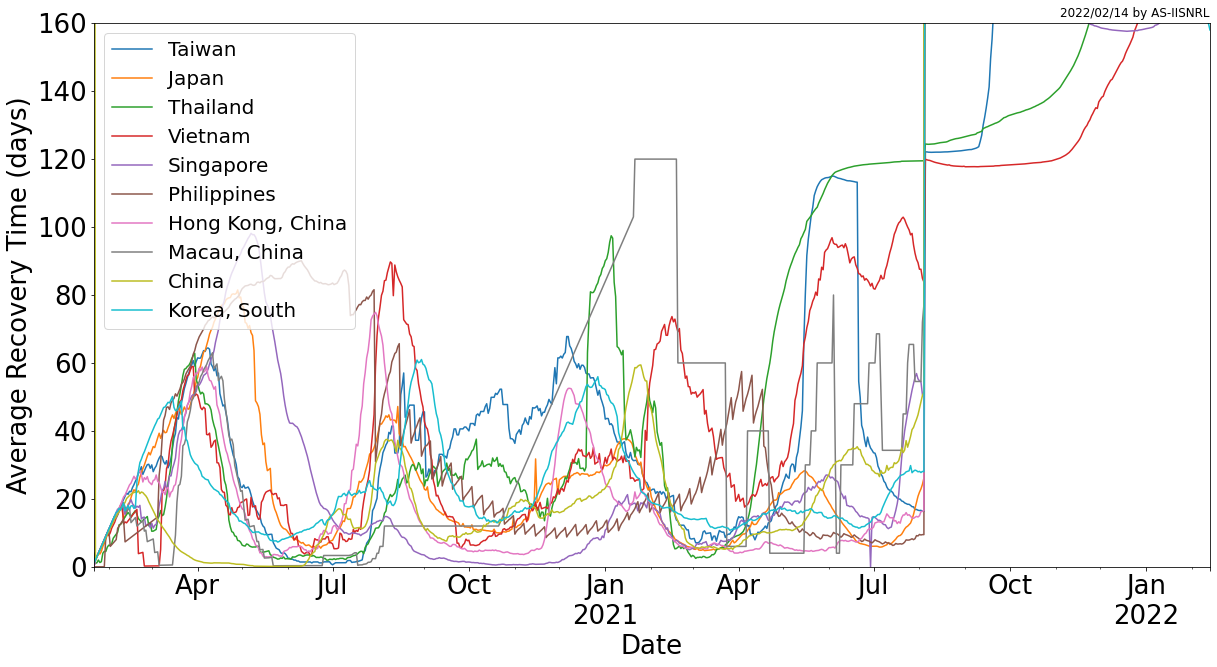

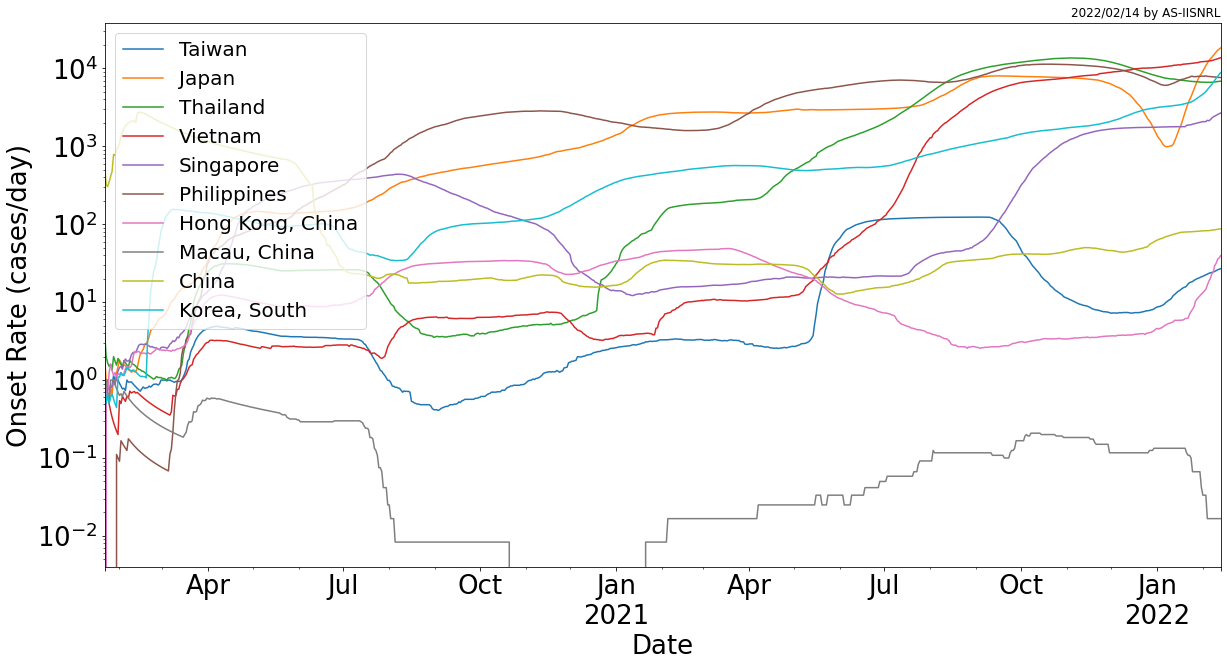

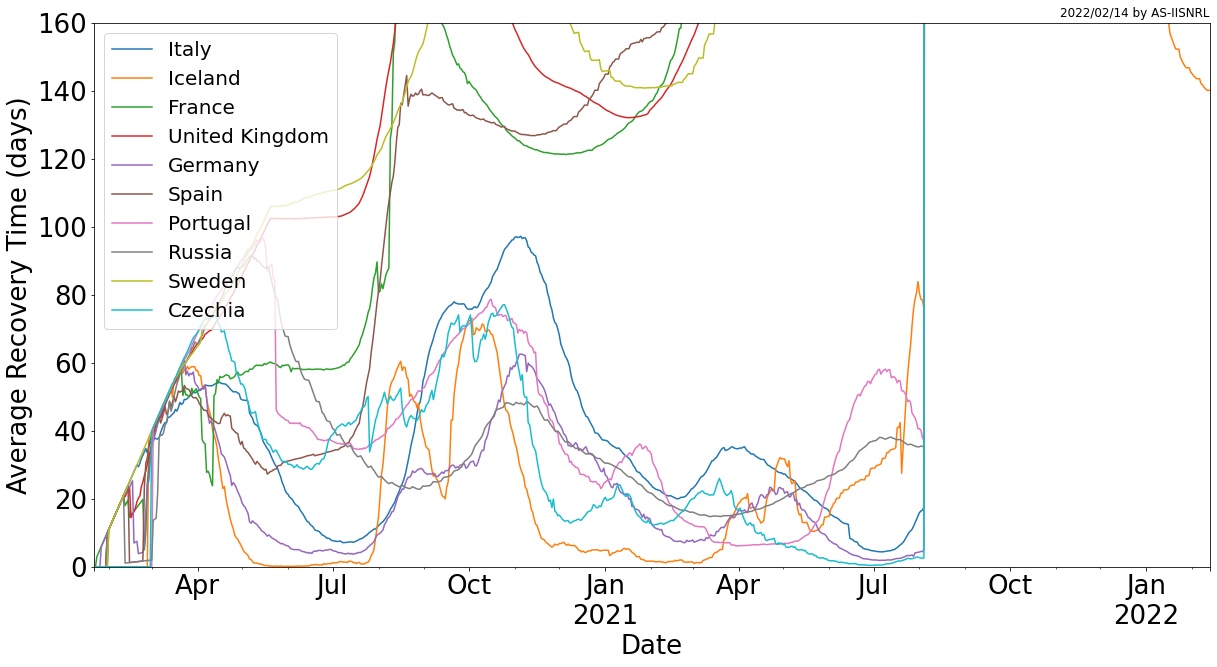

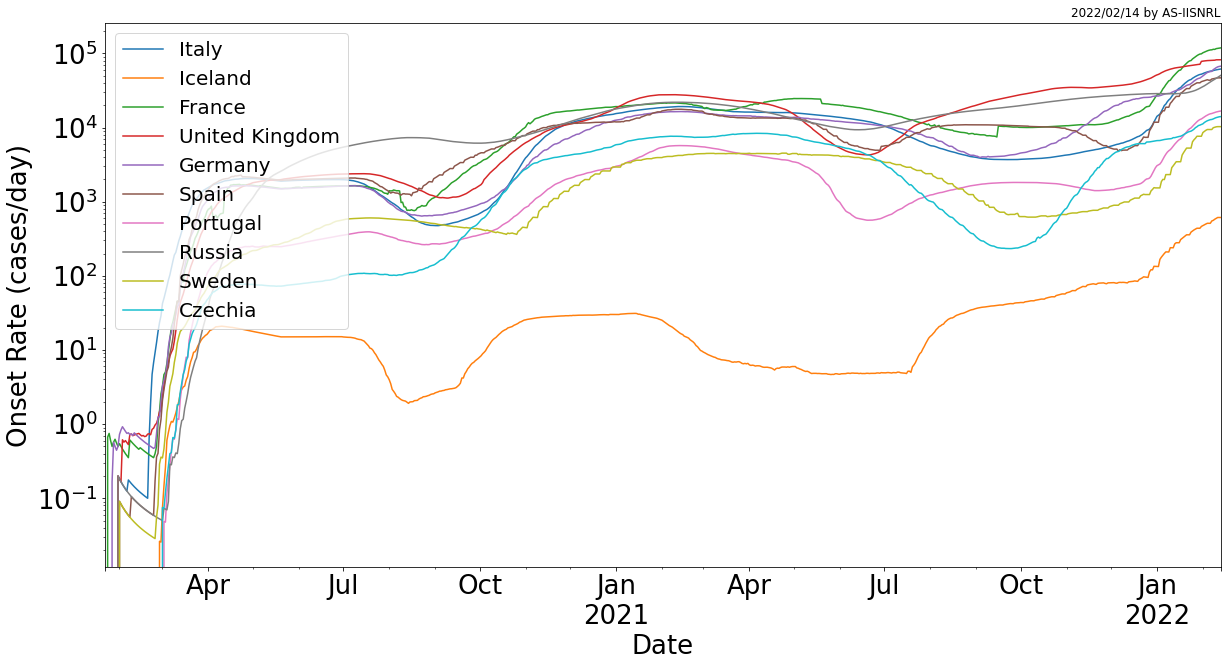

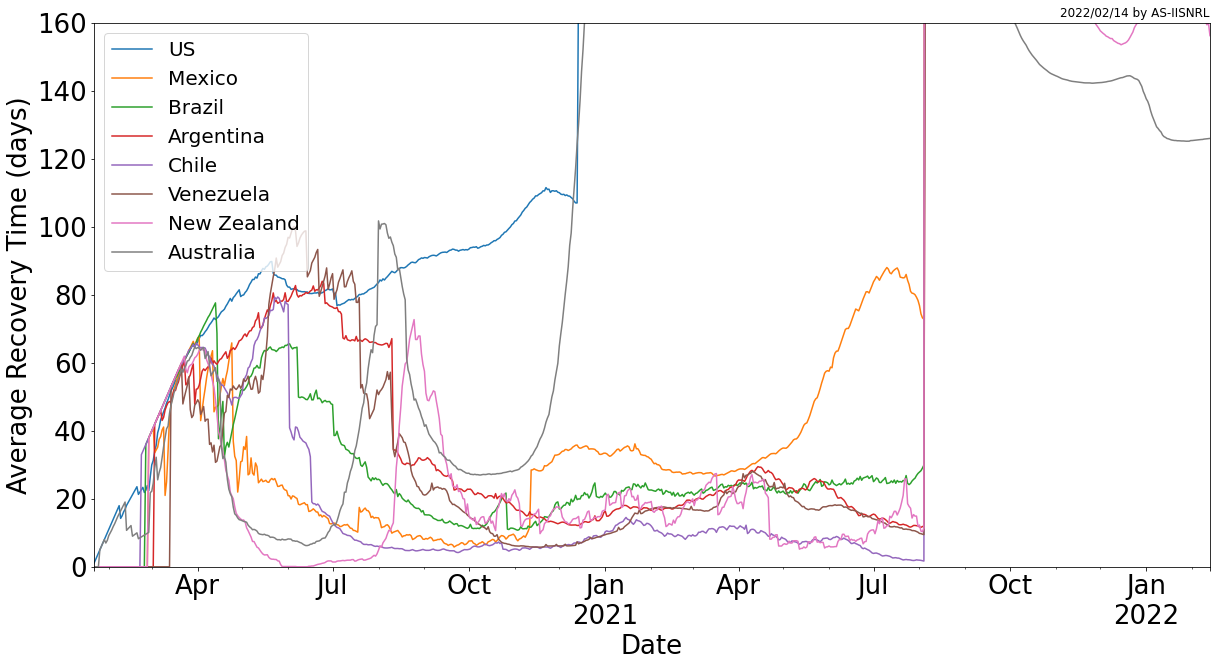

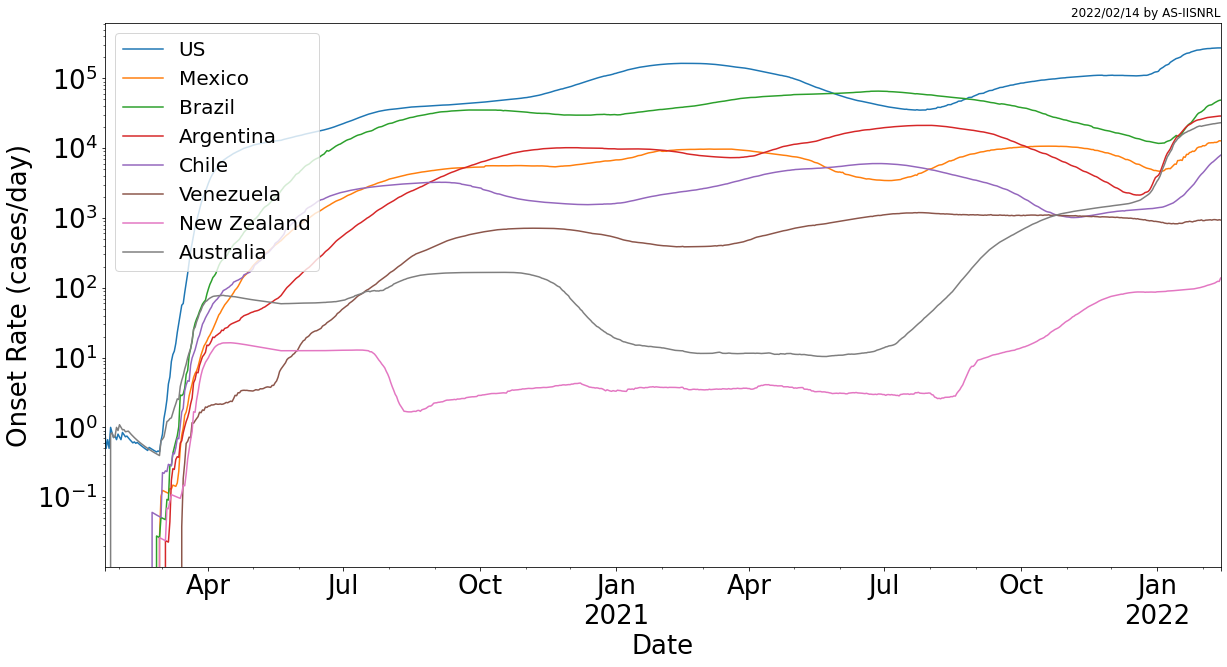

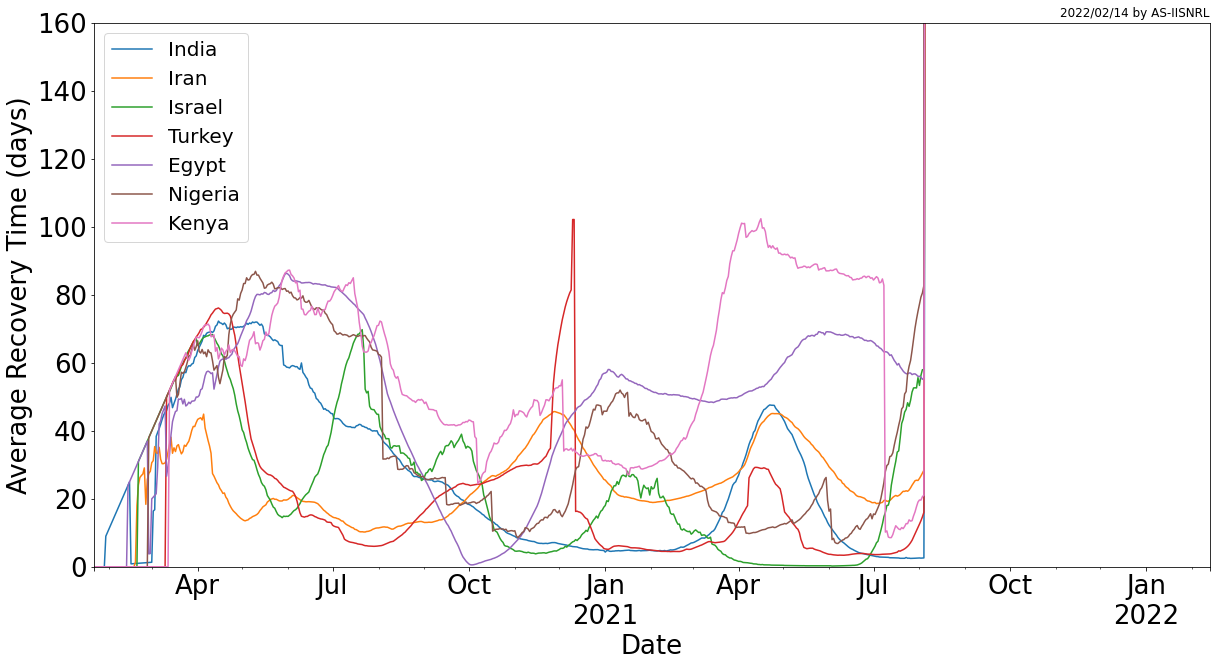

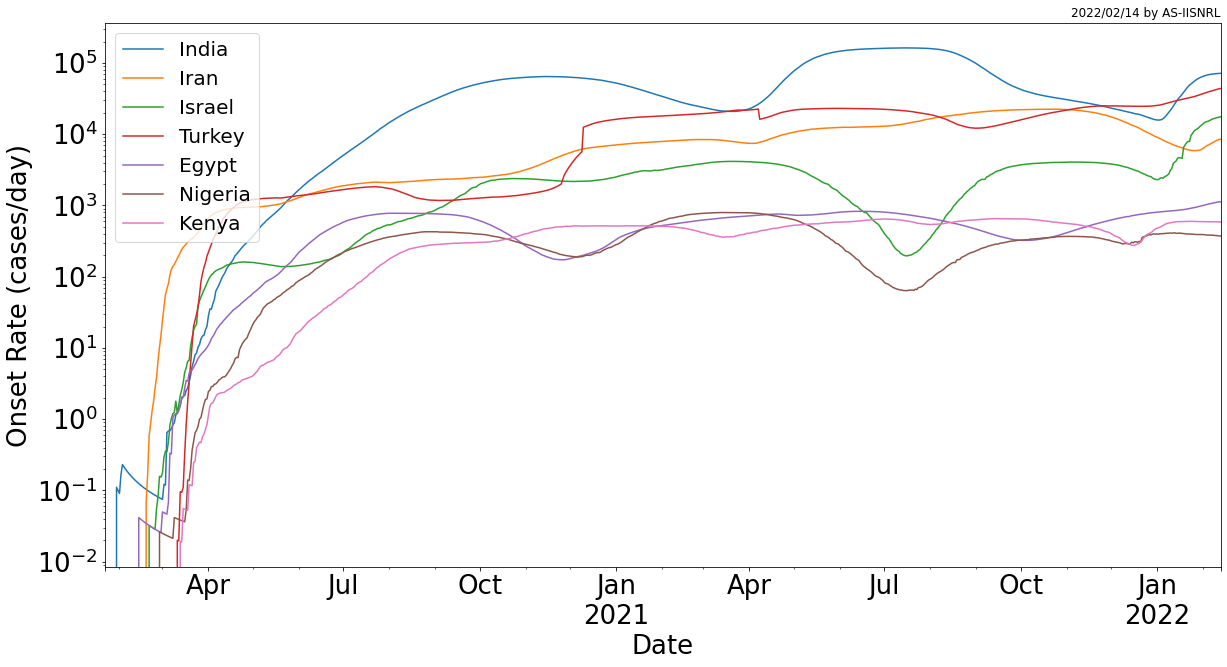

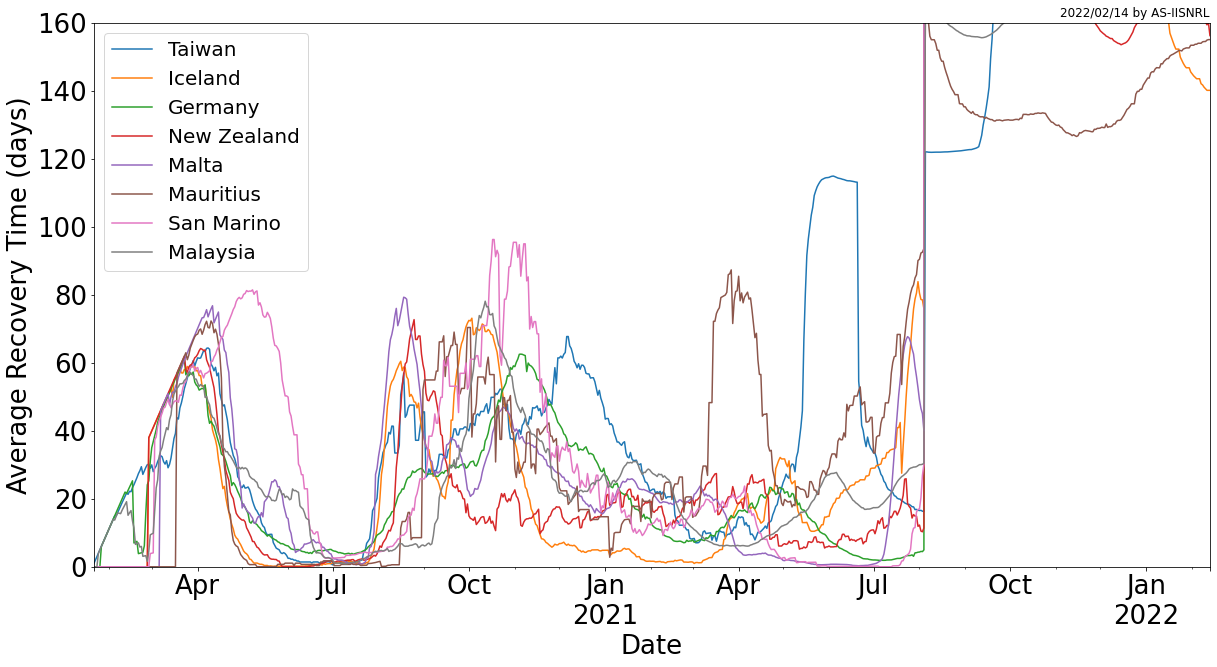

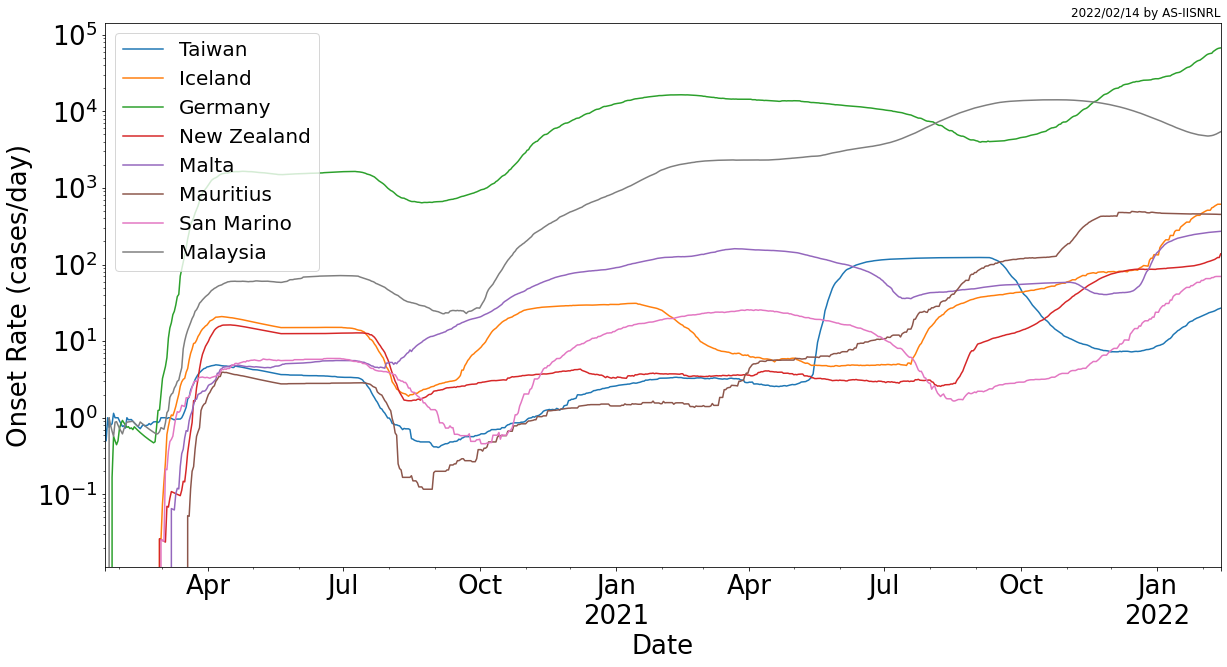

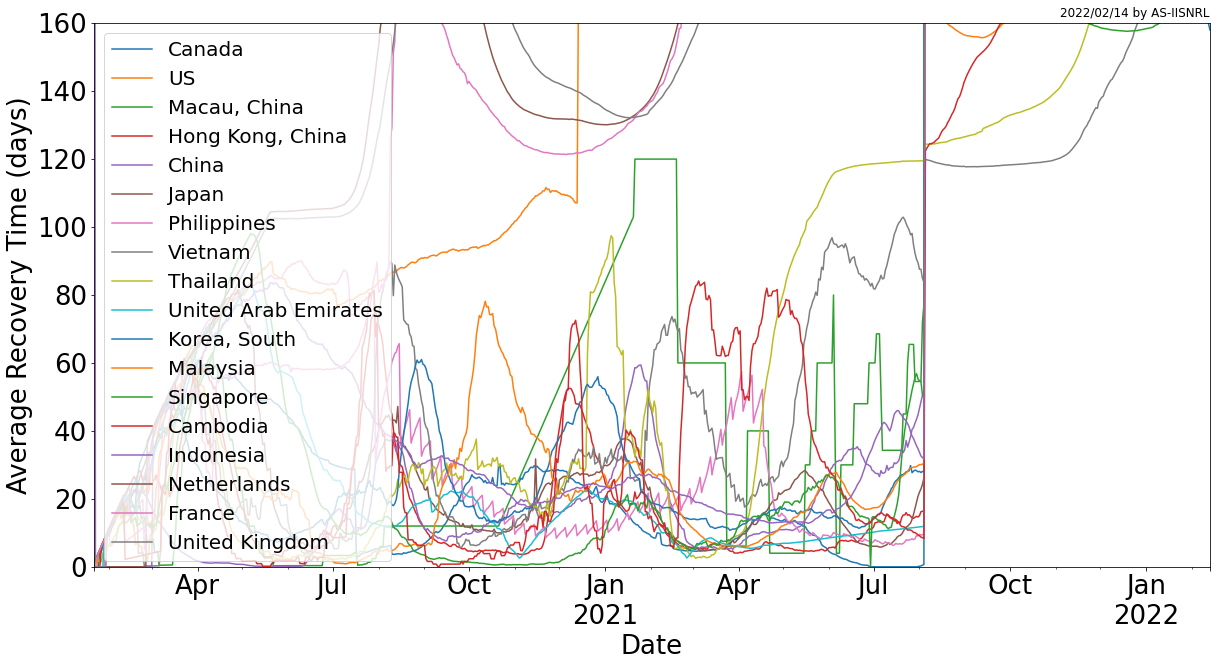

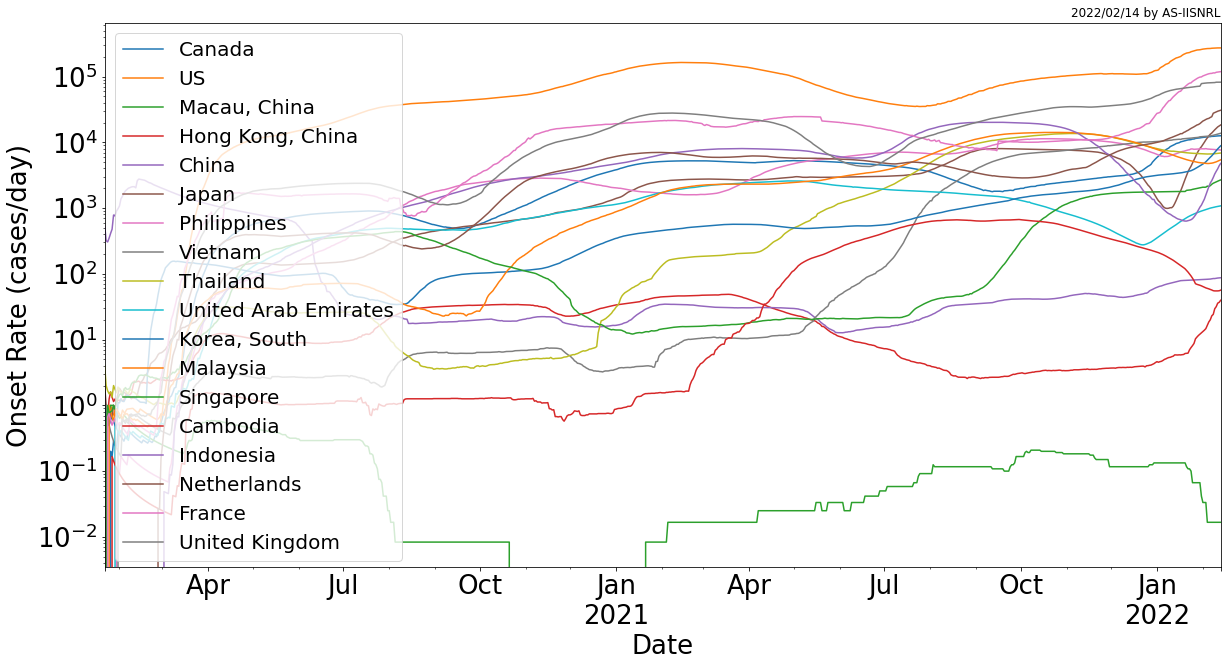

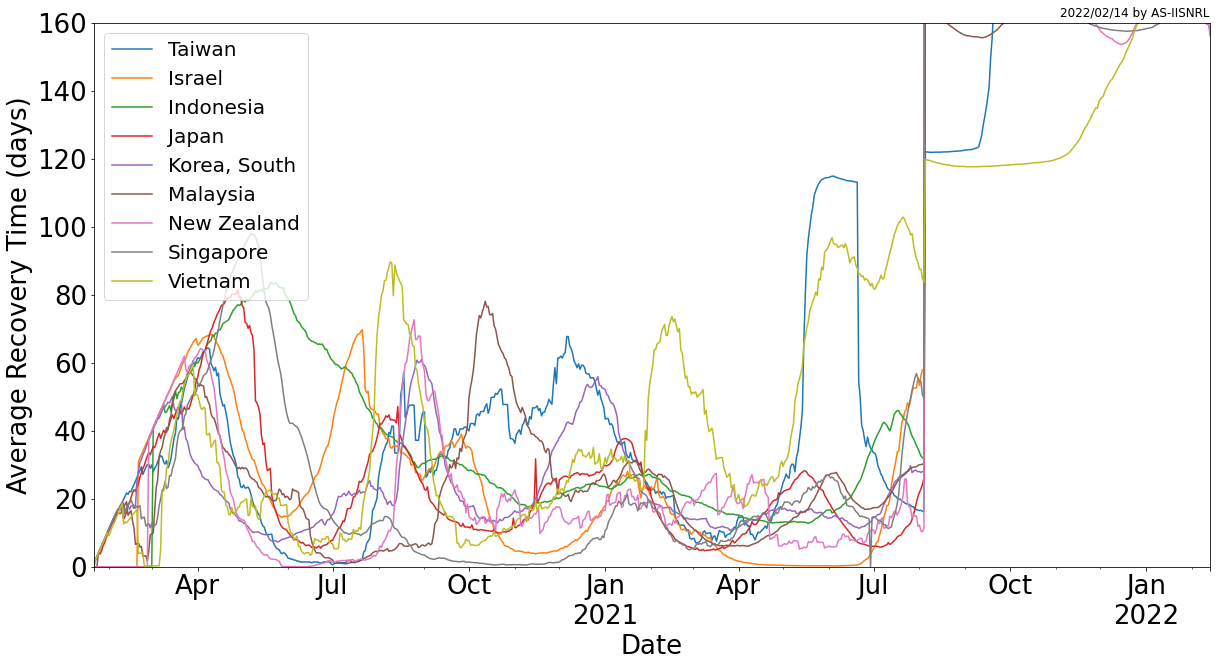

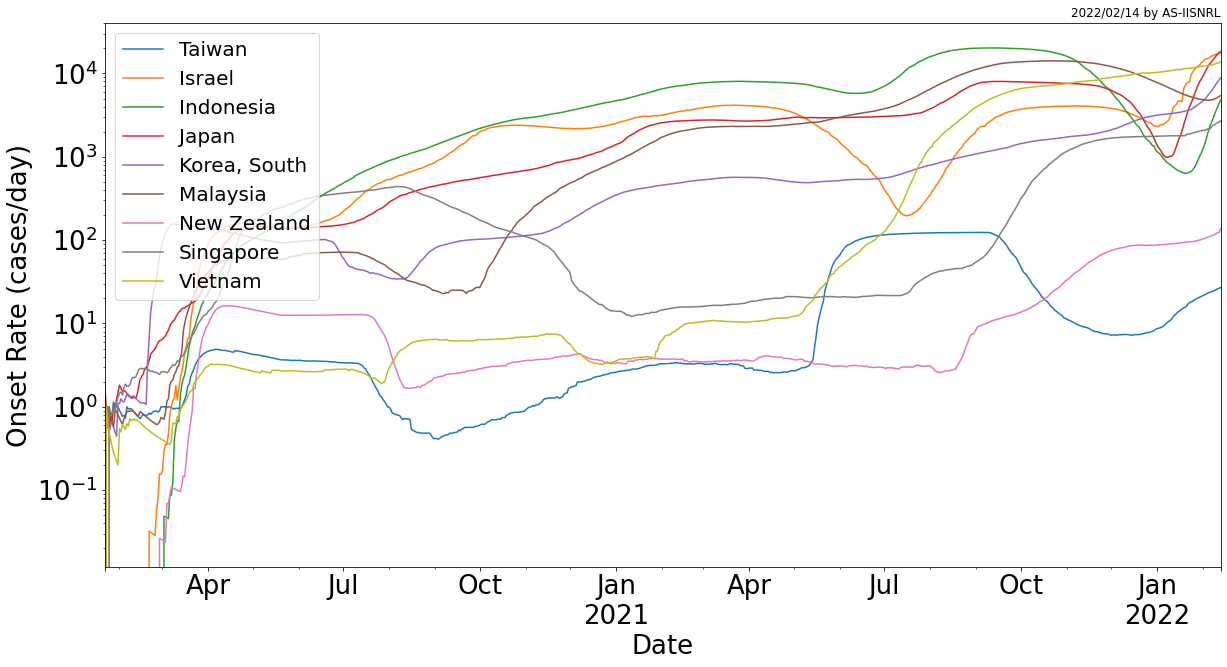

In [9]:
for country in PLOT_Countries:
  plot = T2.plot(ylim=(0,160),figsize=(20,10),logy=False,fontsize=26,y=PLOT_Countries[country]["countries"])
  plt.xlabel('Date', fontsize=PLOT_FONT_SIZE)
  plt.ylabel('Average Recovery Time (days)', fontsize=PLOT_FONT_SIZE)
  plt.title(version + " by AS-IISNRL",loc="right")
  plt.legend(loc='upper left')
  plt.show()
  fig = plot.get_figure()
  fig.savefig(IMG_FOLDER + "/latest_" + PLOT_Countries[country]["fname"] + "_T.png", bbox_inches='tight')
  plt.close(fig)

  plot = A2.plot(figsize=(20,10),logy=True,fontsize=26,y=PLOT_Countries[country]["countries"])
  plt.xlabel('Date', fontsize=PLOT_FONT_SIZE)
  plt.ylabel('Onset Rate (cases/day)', fontsize=PLOT_FONT_SIZE)
  plt.title(version + " by AS-IISNRL",loc="right")
  plt.legend(loc='upper left')
  plt.show()
  fig = plot.get_figure()
  fig.savefig(IMG_FOLDER + "/latest_" + PLOT_Countries[country]["fname"] + "_A.png", bbox_inches='tight')
  plt.close(fig)

# **Group**: Out of Control

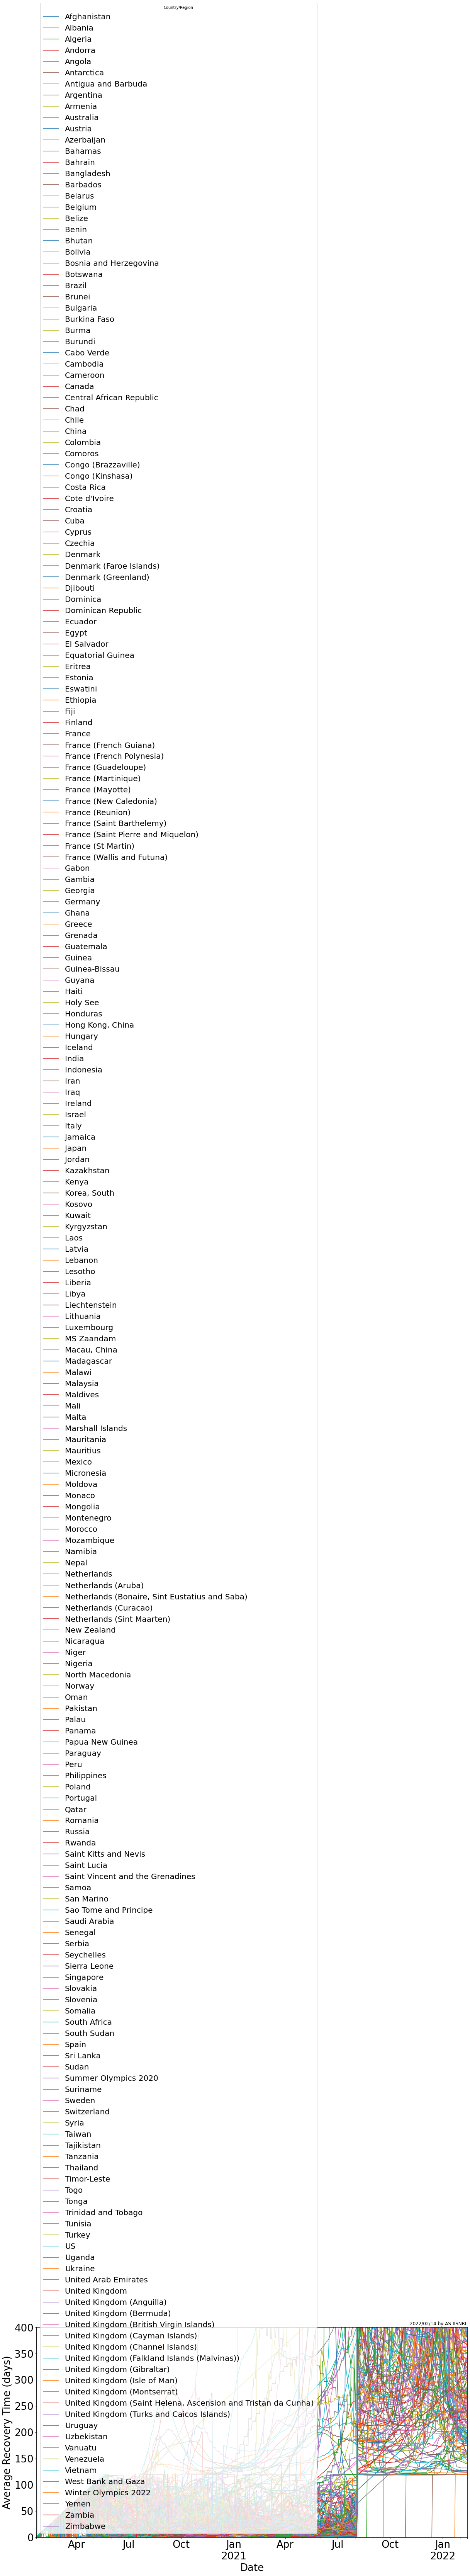

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:515: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(self.ylim)


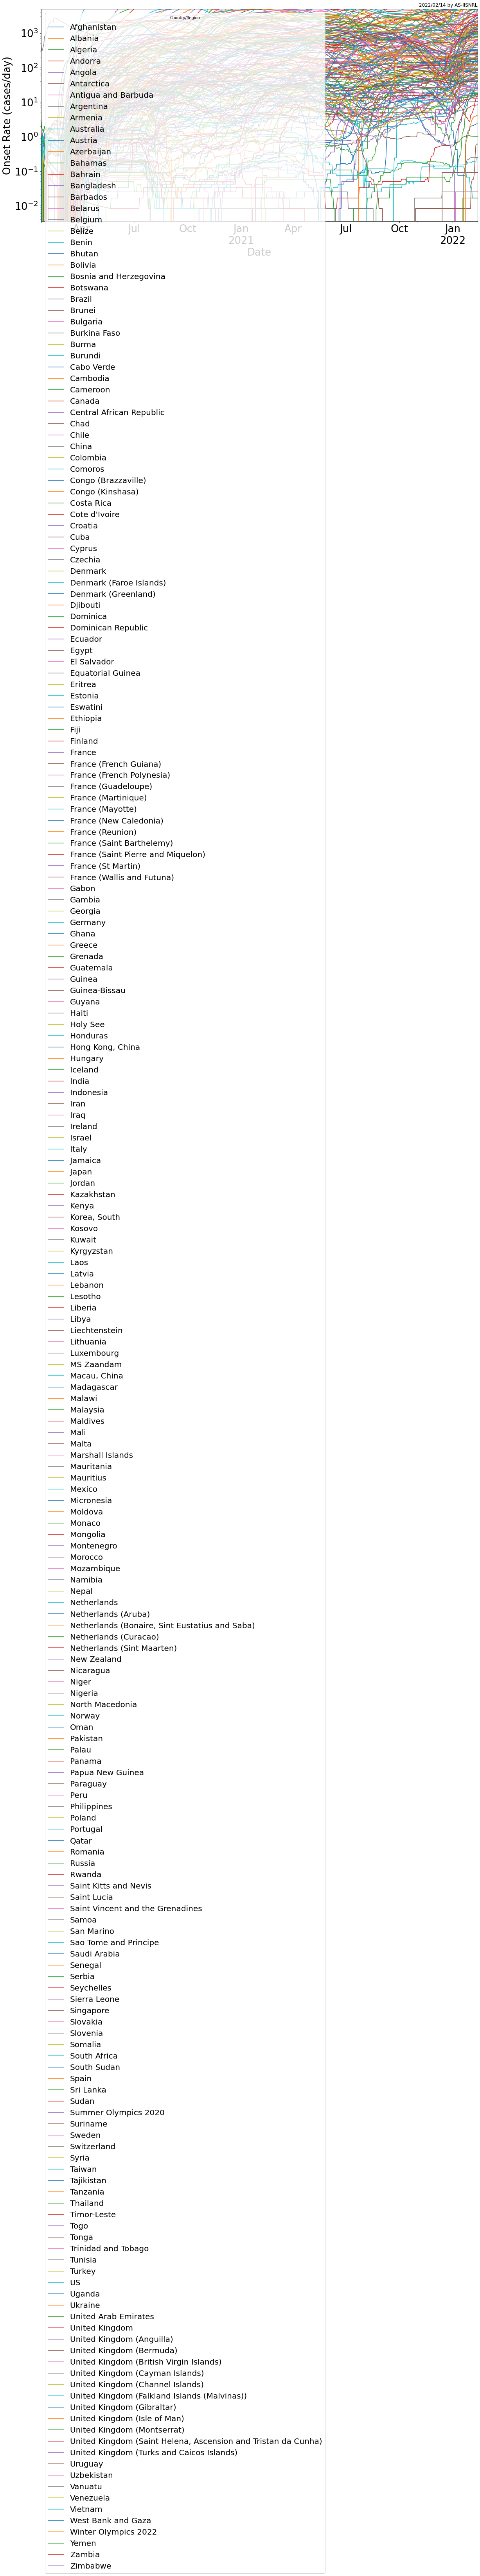

In [10]:
to_show = []
for index, row in T.iterrows():
  if T.at[index,T.columns[len(T.columns)-1]]>=120:
    to_show.append(T.at[index,T.columns[0]])
    #print(T.at[index,T.columns[len(T.columns)-1]], T.at[index,T.columns[0]])
#print(to_show)

plot = T2.plot(ylim=(0,400),figsize=(20,10),logy=False,fontsize=26,y=to_show)
plt.xlabel('Date', fontsize=PLOT_FONT_SIZE)
plt.ylabel('Average Recovery Time (days)', fontsize=PLOT_FONT_SIZE)
plt.title(version + " by AS-IISNRL",loc="right")
plt.show()
fig = plot.get_figure()
fig.savefig(IMG_FOLDER + "/latest_worst_T.png", bbox_inches='tight')
plt.close(fig)

plot = A2.plot(ylim=(0,5000),figsize=(20,10),logy=True,fontsize=26,y=to_show)
plt.xlabel('Date', fontsize=PLOT_FONT_SIZE)
plt.ylabel('Onset Rate (cases/day)', fontsize=PLOT_FONT_SIZE)
plt.title(version + " by AS-IISNRL",loc="right")
plt.show()
fig = plot.get_figure()
fig.savefig(IMG_FOLDER + "/latest_worst_A.png", bbox_inches='tight')
plt.close(fig)

# **Group**: Under Good Control


In [12]:
to_show = []
for index, row in T.iterrows():
  if T.at[index,T.columns[len(T.columns)-1]]<20 and df1.at[index,T.columns[len(T.columns)-1]] > 400 and A.at[index,T.columns[len(T.columns)-1]]<50:
    to_show.append(T.at[index,T.columns[0]])
    #print(df1.at[index,T.columns[len(T.columns)-1]],N.at[index,T.columns[len(T.columns)-1]],T.at[index,T.columns[len(T.columns)-1]], T.at[index,T.columns[0]])
#print(to_show)

plot = T2.plot(ylim=(0,120),figsize=(20,10),logy=False,fontsize=26,y=to_show)
plt.xlabel('Date', fontsize=PLOT_FONT_SIZE)
plt.ylabel('Average Recovery Time (days)', fontsize=PLOT_FONT_SIZE)
plt.title(version + " by AS-IISNRL",loc="right")
plt.show()
fig = plot.get_figure()
fig.savefig(IMG_FOLDER + "/latest_best_T.png", bbox_inches='tight')
plt.close(fig)

plot = A2.plot(ylim=(0,100),figsize=(20,10),logy=False,fontsize=26,y=to_show)
plt.xlabel('Date', fontsize=PLOT_FONT_SIZE)
plt.ylabel('Onset Rate (cases/day)', fontsize=PLOT_FONT_SIZE)
plt.title(version + " by AS-IISNRL",loc="right")
plt.show()
fig = plot.get_figure()
fig.savefig(IMG_FOLDER + "/latest_best_A.png", bbox_inches='tight')
plt.close(fig)

TypeError: ignored

# **Group**: Rare cases

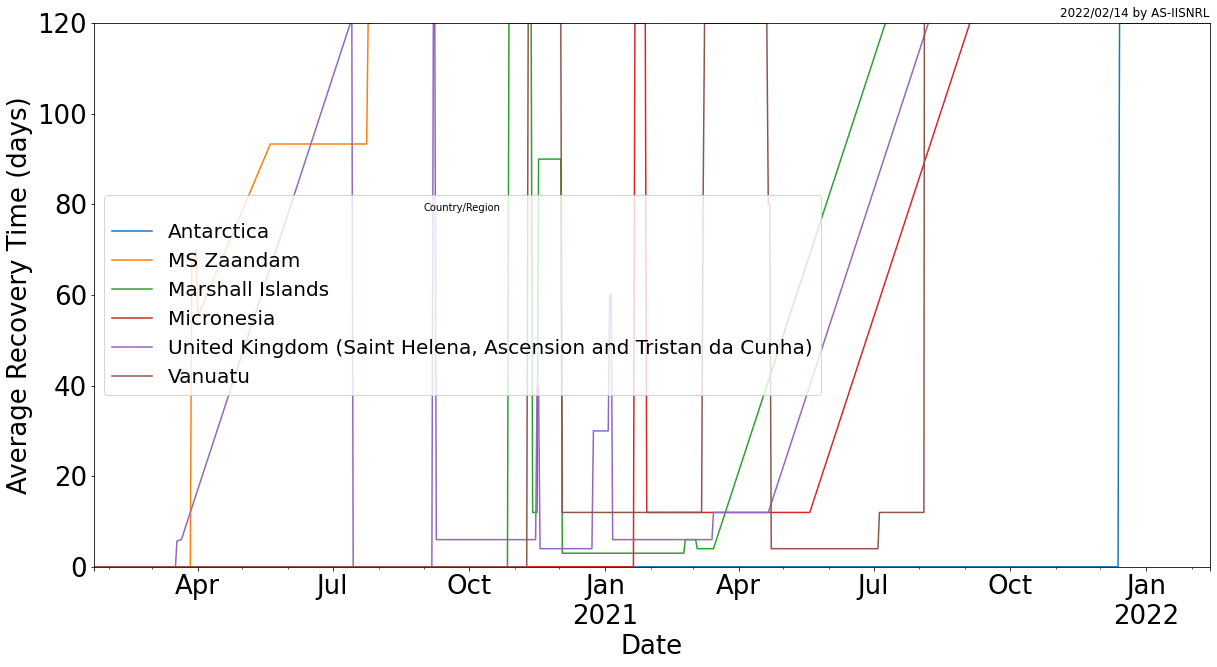

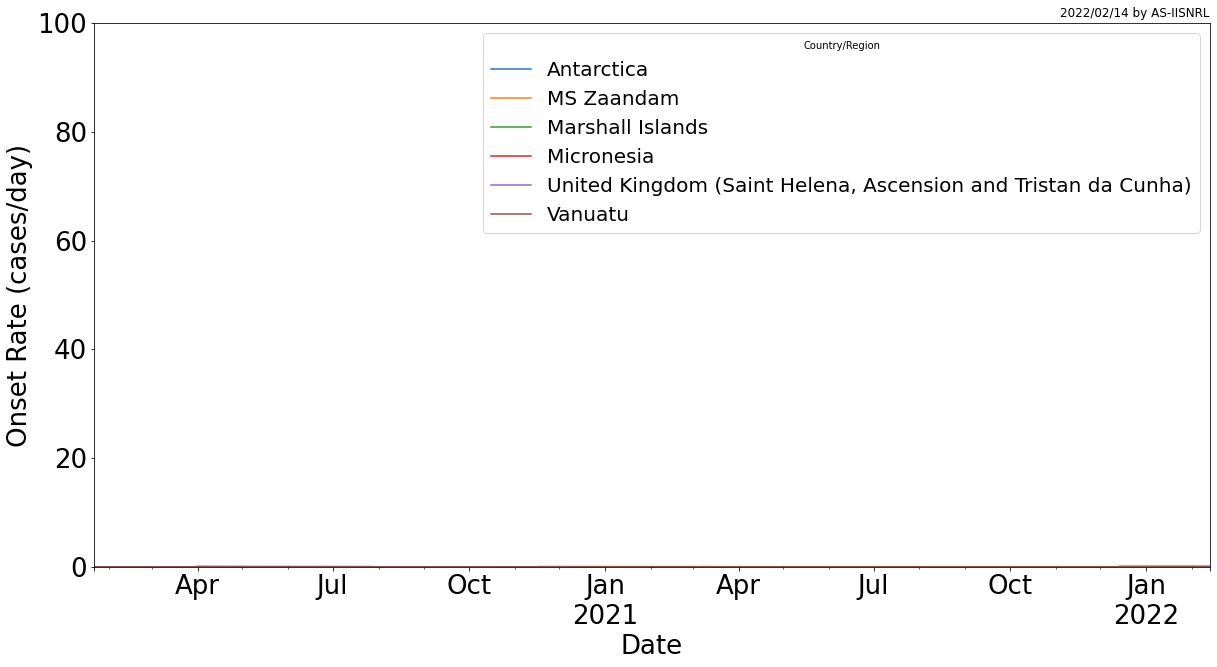

In [13]:
to_show = []
for index, row in T.iterrows():
  if df1.at[index,T.columns[len(T.columns)-1]] < 20:
    to_show.append(T.at[index,T.columns[0]])
    #print(df1.at[index,T.columns[len(T.columns)-1]],N.at[index,T.columns[len(T.columns)-1]],T.at[index,T.columns[len(T.columns)-1]], T.at[index,T.columns[0]])
#print(to_show)

plot = T2.plot(ylim=(0,120),figsize=(20,10),logy=False,fontsize=26,y=to_show)
plt.xlabel('Date', fontsize=PLOT_FONT_SIZE)
plt.ylabel('Average Recovery Time (days)', fontsize=PLOT_FONT_SIZE)
plt.title(version + " by AS-IISNRL",loc="right")
plt.show()
fig = plot.get_figure()
fig.savefig(IMG_FOLDER + "/latest_rare_T.png", bbox_inches='tight')
plt.close(fig)

plot = A2.plot(ylim=(0,100),figsize=(20,10),logy=False,fontsize=26,y=to_show)
plt.xlabel('Date', fontsize=PLOT_FONT_SIZE)
plt.ylabel('Onset Rate (cases/day)', fontsize=PLOT_FONT_SIZE)
plt.title(version + " by AS-IISNRL",loc="right")
plt.show()
fig = plot.get_figure()
fig.savefig(IMG_FOLDER + "/latest_rare_A.png", bbox_inches='tight')
plt.close(fig)

# **Group**: About zero cases

In [14]:
to_show = []
for index, row in T.iterrows():
  if A.at[index,T.columns[len(T.columns)-1]] < 3 and df1.at[index,T.columns[len(T.columns)-1]] > 400 and T.at[index,T.columns[len(T.columns)-1]]<20:
    to_show.append(T.at[index,T.columns[0]])
    #print(df1.at[index,T.columns[len(T.columns)-1]],N.at[index,T.columns[len(T.columns)-1]],T.at[index,T.columns[len(T.columns)-1]], T.at[index,T.columns[0]])
#print(to_show)

plot = T2.plot(figsize=(20,10),logy=False,fontsize=26,y=to_show)
plt.xlabel('Date', fontsize=PLOT_FONT_SIZE)
plt.ylabel('Average Recovery Time (days)', fontsize=PLOT_FONT_SIZE)
plt.title(version + " by AS-IISNRL",loc="right")
plt.show()
fig = plot.get_figure()
fig.savefig(IMG_FOLDER + "/latest_zero_T.png", bbox_inches='tight')
plt.close(fig)

plot = A2.plot(figsize=(20,10),logy=False,fontsize=26,y=to_show)
plt.xlabel('Date', fontsize=PLOT_FONT_SIZE)
plt.ylabel('Onset Rate (cases/day)', fontsize=PLOT_FONT_SIZE)
plt.title(version + " by AS-IISNRL",loc="right")
plt.show()
fig = plot.get_figure()
fig.savefig(IMG_FOLDER + "/latest_zero_A.png", bbox_inches='tight')
plt.close(fig)

TypeError: ignored

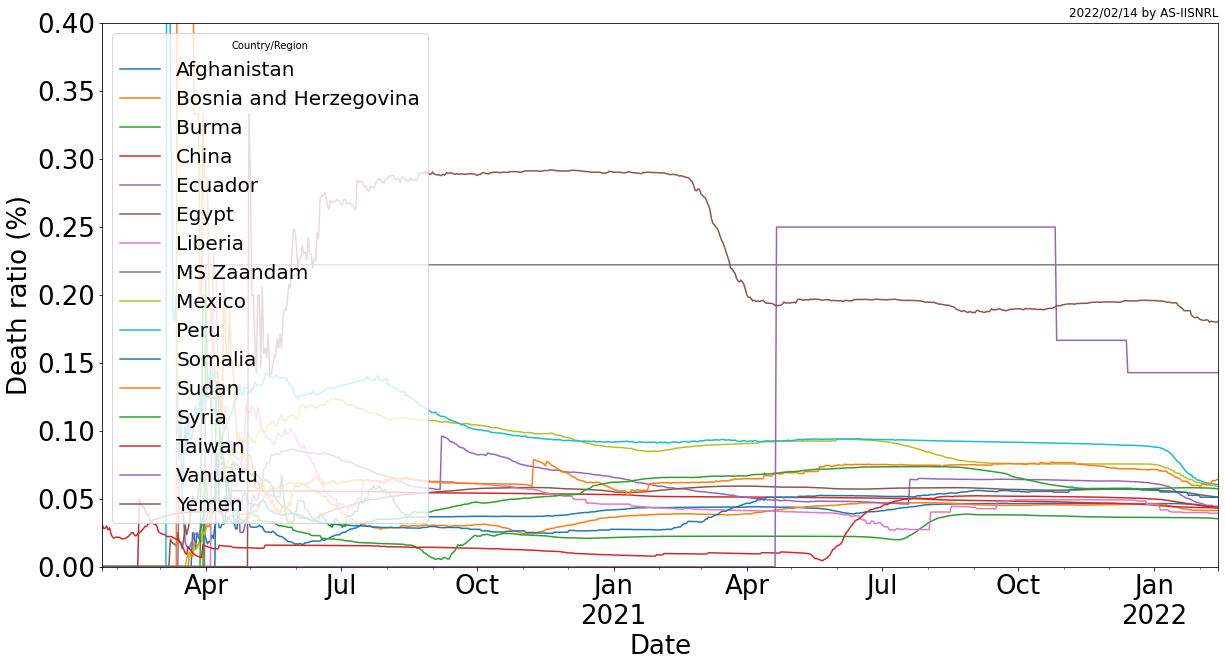

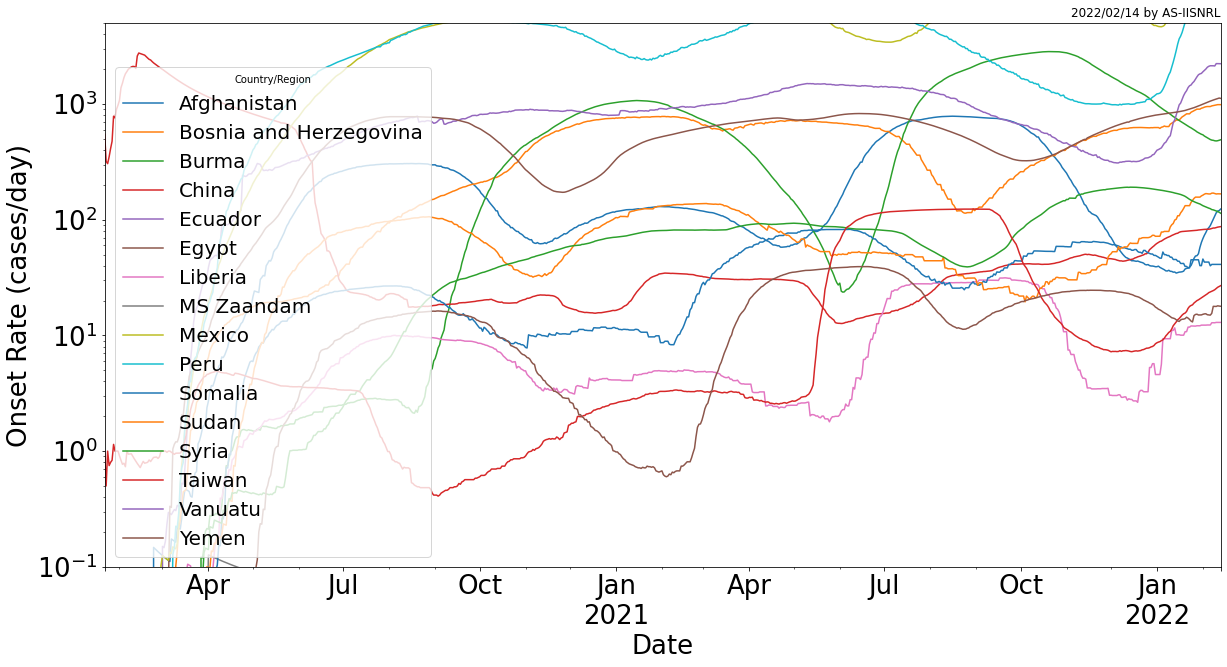

In [15]:
to_show = []
for index, row in D.iterrows():
  if D.at[index,D.columns[len(D.columns)-1]]>0.035:
    to_show.append(D.at[index,D.columns[0]])
    #print(D.at[index,D.columns[len(D.columns)-1]], df1.at[index,D.columns[len(D.columns)-1]], df2.at[index,D.columns[len(D.columns)-1]], D.at[index,D.columns[0]])
#print(to_show)

plot = D2.plot(ylim=(0,0.4),figsize=(20,10),logy=False,fontsize=26,y=to_show)
plt.xlabel('Date', fontsize=PLOT_FONT_SIZE)
plt.ylabel('Death ratio (%)', fontsize=PLOT_FONT_SIZE)
plt.title(version + " by AS-IISNRL",loc="right")
plt.show()
fig = plot.get_figure()
fig.savefig(IMG_FOLDER + "/latest_deathly_D.png", bbox_inches='tight')
plt.close(fig)

plot = A2.plot(ylim=(0.1,5000),figsize=(20,10),logy=True,fontsize=26,y=to_show)
plt.xlabel('Date', fontsize=PLOT_FONT_SIZE)
plt.ylabel('Onset Rate (cases/day)', fontsize=PLOT_FONT_SIZE)
plt.title(version + " by AS-IISNRL",loc="right")
plt.show()
fig = plot.get_figure()
fig.savefig(IMG_FOLDER + "/latest_deathly_A.png", bbox_inches='tight')
plt.close(fig)

In [16]:
output_df = pd.DataFrame({"Country":T[T.columns[0]],"N":N[T.columns[len(T.columns)-1]],"A":A[T.columns[len(T.columns)-1]],"T":T[T.columns[len(T.columns)-1]],"D":D[T.columns[len(T.columns)-1]]})
print(output_df)

output_df_t = output_df.set_index('Country').T
print(output_df_t["Taiwan"])
print(output_df_t["China"])

output_df.describe()


                  Country         N            A            T         D
0             Afghanistan  163110.0   123.666667  1318.948787  0.043926
1                 Albania  264598.0   750.308333   352.652354  0.012724
2                 Algeria  255023.0   470.550000   541.967910  0.025708
3                 Andorra   36992.0   181.683333   203.607009  0.003985
4                  Angola   96616.0   297.266667   325.014577  0.019266
..                    ...       ...          ...          ...       ...
222    West Bank and Gaza  594913.0  1275.800000   466.305847  0.008690
223  Winter Olympics 2022     501.0     4.175000   120.000000  0.000100
224                 Yemen    9568.0    17.875000   535.272727  0.180190
225                Zambia  305565.0   833.175000   366.747682  0.012720
226              Zimbabwe  226007.0   825.108333   273.911911  0.023226

[227 rows x 5 columns]
N    18716.000000
A       26.916667
T      695.331269
D        0.043492
Name: Taiwan, dtype: float64
N    102378

N              A             T           D
count  2.270000e+02     227.000000    227.000000  227.000000
mean   1.788132e+06    6254.627386    733.676944    0.015966
std    6.554506e+06   22642.114650   3654.994697    0.022951
min    1.000000e+00       0.000000    118.979638    0.000100
25%    1.952850e+04      57.154167    210.732264    0.005851
50%    1.311150e+05     322.133333    312.920196    0.011092
75%    9.066135e+05    2821.600000    509.529745    0.020019
max    7.682018e+07  272684.283333  53804.000000    0.222222

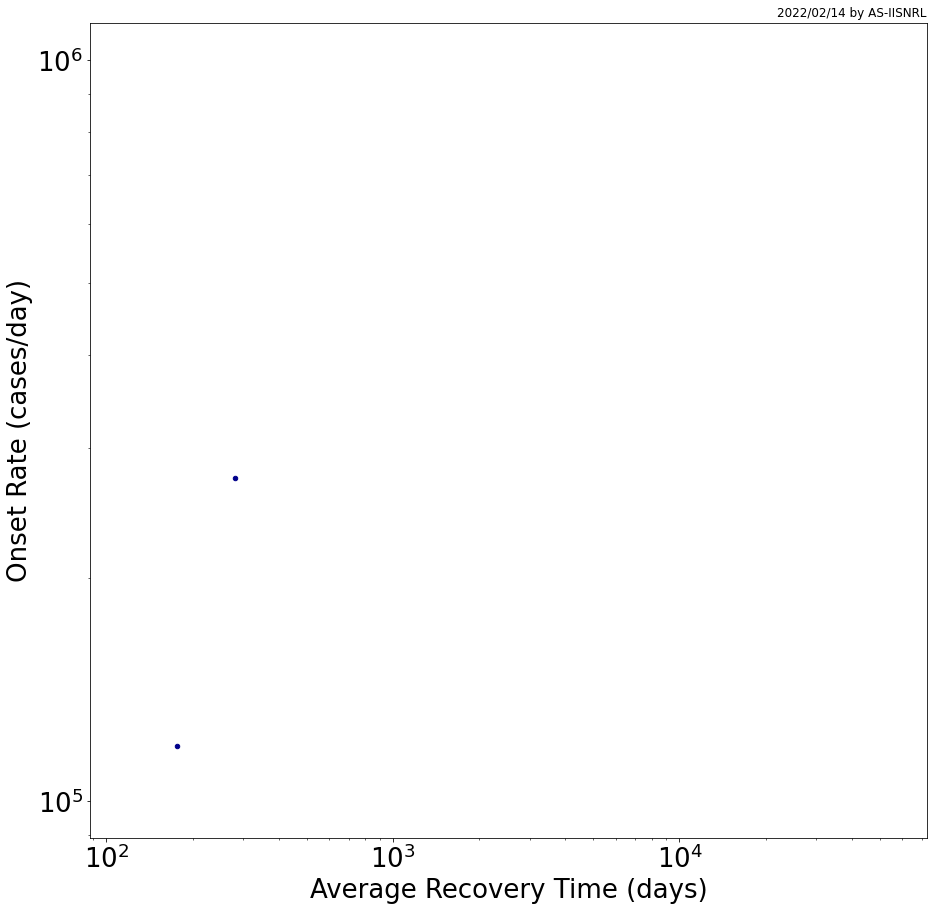

ValueError: ignored

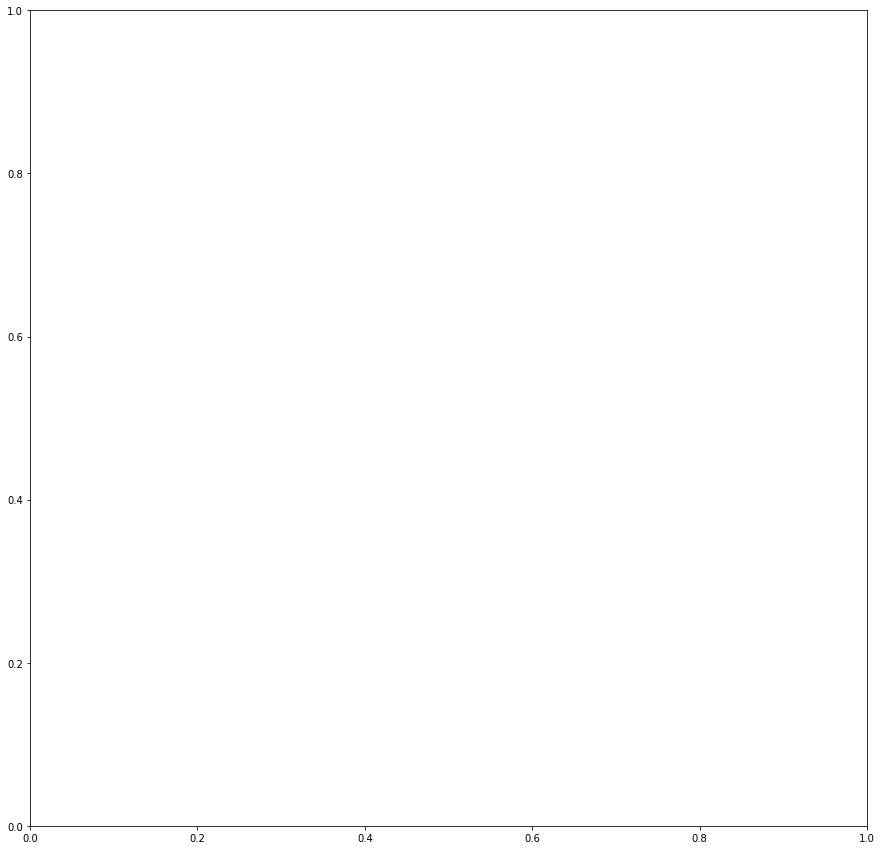

In [17]:

plot = output_df.plot.scatter(x='T', y='A', figsize=(15,15),fontsize=26,logy=True, logx=True, c='DarkBlue')
plt.xlabel('Average Recovery Time (days)', fontsize=PLOT_FONT_SIZE)
plt.ylabel('Onset Rate (cases/day)', fontsize=PLOT_FONT_SIZE)
plt.title(version + " by AS-IISNRL",loc="right")
plt.show()
fig = plot.get_figure()
fig.savefig(IMG_FOLDER + "/latest_all_A-T.png", bbox_inches='tight')
plt.close(fig)

fig, ax = plt.subplots()
plot = output_df.plot.hexbin(x='T', y='A', figsize=(15,15),fontsize=26,gridsize=20, xscale='log', yscale='log', mincnt=1, cmap='Blues', ax=ax)
ax.set_xlabel('Average Recovery Time (days)', fontsize=PLOT_FONT_SIZE)
ax.set_ylabel('Onset Rate (cases/day)', fontsize=PLOT_FONT_SIZE)
plt.title(version + " by AS-IISNRL",loc="right")
plt.show()
fig.savefig(IMG_FOLDER + "/latest_all_A-T_hexbin.png", bbox_inches='tight')
plt.close(fig)



plot = output_df.plot.scatter(x='T', y='D', ylim=(0.0005,0.5), figsize=(15,15),fontsize=26,logy=True, logx=True, c='DarkBlue')
plt.xlabel('Average Recovery Time (days)', fontsize=PLOT_FONT_SIZE)
plt.ylabel('Death ratio (%)', fontsize=PLOT_FONT_SIZE)
plt.title(version + " by AS-IISNRL",loc="right")
plt.show()
fig = plot.get_figure()
fig.savefig(IMG_FOLDER + "/latest_all_D-T.png", bbox_inches='tight')
plt.close(fig)

fig, ax = plt.subplots()
plot = output_df.plot.hexbin(x='T', y='D', ylim=(0.0005,0.5), figsize=(15,15),fontsize=26,gridsize=20, xscale='log', yscale='log', mincnt=1, cmap='Blues', ax=ax)
ax.set_xlabel('Average Recovery Time (days)', fontsize=PLOT_FONT_SIZE)
ax.set_ylabel('Death ratio (%)', fontsize=PLOT_FONT_SIZE)
plt.title(version + " by AS-IISNRL",loc="right")
plt.show()
fig.savefig(IMG_FOLDER + "/latest_all_D-T_hexbin.png", bbox_inches='tight')
plt.close(fig)


plot = output_df.plot.scatter(x='N', y='A', figsize=(15,15),fontsize=26,logy=True, logx=True, c='DarkBlue')
plt.xlabel('Active Case Number (cases)', fontsize=PLOT_FONT_SIZE)
plt.ylabel('Onset Rate (cases/day)', fontsize=PLOT_FONT_SIZE)
plt.title(version + " by AS-IISNRL",loc="right")
plt.show()
fig = plot.get_figure()
fig.savefig(IMG_FOLDER + "/latest_all_A-N.png", bbox_inches='tight')
plt.close(fig)

fig, ax = plt.subplots()
plot = output_df.plot.hexbin(x='N', y='A',figsize=(15,15),fontsize=26,gridsize=20, xscale='log', yscale='log', mincnt=1, cmap='Blues', ax=ax)
ax.set_xlabel('Active Case Number (cases)', fontsize=PLOT_FONT_SIZE)
ax.set_ylabel('Onset Rate (cases/day)', fontsize=PLOT_FONT_SIZE)
plt.title(version + " by AS-IISNRL",loc="right")
plt.show()
fig.savefig(IMG_FOLDER + "/latest_all_A-N_hexbin.png", bbox_inches='tight')
plt.close(fig)



plot = output_df.plot.scatter(x='N', y='D', ylim=(0.0005,0.5), figsize=(15,15),fontsize=26,logy=True, logx=True, c='DarkBlue')
plt.xlabel('Active Case Number (cases)', fontsize=PLOT_FONT_SIZE)
plt.ylabel('Death ratio (%)', fontsize=PLOT_FONT_SIZE)
plt.title(version + " by AS-IISNRL",loc="right")
plt.show()
fig = plot.get_figure()
fig.savefig(IMG_FOLDER + "/latest_all_D-N.png", bbox_inches='tight')
plt.close(fig)

fig, ax = plt.subplots()
plot = output_df.plot.hexbin(x='N', y='D', ylim=(0.0005,0.5), figsize=(15,15),fontsize=26,gridsize=20, xscale='log', yscale='log', mincnt=1, cmap='Blues', ax=ax)
ax.set_xlabel('Active Case Number (cases)', fontsize=PLOT_FONT_SIZE)
ax.set_ylabel('Death ratio (%)', fontsize=PLOT_FONT_SIZE)
plt.title(version + " by AS-IISNRL",loc="right")
plt.show()
fig.savefig(IMG_FOLDER + "/latest_all_D-N_hexbin.png", bbox_inches='tight')
plt.close(fig)



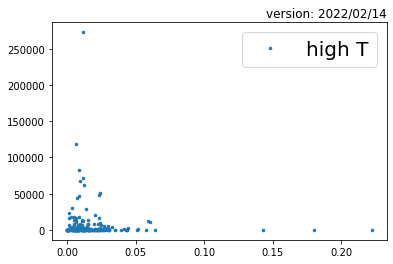

In [18]:
output_df['group'] = np.where(output_df['T']>=2, "high T", "low T")
#print(output_df)
groups = output_df.groupby('group')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    #print(group)
    ax.plot(group.D, group.A, marker='.', linestyle='', ms=5, label=name)
ax.legend()
plt.title("version: " + version,loc="right")
plt.show()
#fig = plot.get_figure()
fig.savefig(IMG_FOLDER + "/latest_groups_A-D.png", bbox_inches='tight')
plt.close(fig)

In [19]:
output_df['group'] = np.where(output_df['A']>=output_df['N'], "A large", "N large")
groups = output_df.groupby('group')
for name, group in groups:
  print(group)
  for index, row in group.iterrows():
    print(row["Country"],row["N"],row["A"])


                  Country         N  ...         D    group
0             Afghanistan  163110.0  ...  0.043926  N large
1                 Albania  264598.0  ...  0.012724  N large
2                 Algeria  255023.0  ...  0.025708  N large
3                 Andorra   36992.0  ...  0.003985  N large
4                  Angola   96616.0  ...  0.019266  N large
..                    ...       ...  ...       ...      ...
222    West Bank and Gaza  594913.0  ...  0.008690  N large
223  Winter Olympics 2022     501.0  ...  0.000100  N large
224                 Yemen    9568.0  ...  0.180190  N large
225                Zambia  305565.0  ...  0.012720  N large
226              Zimbabwe  226007.0  ...  0.023226  N large

[227 rows x 6 columns]
Afghanistan 163110.0 123.66666666666667
Albania 264598.0 750.3083333333333
Algeria 255023.0 470.55
Andorra 36992.0 181.68333333333334
Angola 96616.0 297.26666666666665
Antarctica 11.0 0.09166666666666666
Antigua and Barbuda 7197.0 28.691666666666666
Argent